In [10]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [11]:

####################################################################################################
####################################################################################################

file_xy  = "./predictions/S2_S2integrals.pkl"
df_xy    = pd.read_pickle(file_xy)

print(df_xy.shape)

display(df_xy[0:5][:])
print()


####################################################################################################
####################################################################################################

arr_s2_true = df_xy[:]['s2_electrons'     ].as_matrix()
arr_s2_reco = df_xy[:]['intr_s2_electrons'].as_matrix()
arr_s2_pred = df_xy[:]['s2_electrons_pred'].as_matrix()

arr_ds2_reco = arr_s2_true - arr_s2_reco
arr_ds2_pred = arr_s2_true - arr_s2_pred



(17982, 4)


,event_number,s2_electrons,intr_s2_electrons,s2_electrons_pred
0,1,79,98.696105,82.628342
1,3,75,93.844360,82.064468
2,5,73,86.820609,88.654694
3,6,70,99.468229,84.423370
4,8,109,124.397948,104.409515


In [12]:

####################################################################################################
####################################################################################################

s2_max         = 300
s2_nbins       = 300/5

s2_delta_max   = 60
s2_delta_nbins = 120/2

s2_true_mean = np.mean(arr_s2_true)
s2_reco_mean = np.mean(arr_s2_reco)
s2_pred_mean = np.mean(arr_s2_pred)

s2_true_std  = np.std(arr_s2_true)
s2_reco_std  = np.std(arr_s2_reco)
s2_pred_std  = np.std(arr_s2_pred)

ds2_reco_mean = np.mean(arr_ds2_reco)
ds2_pred_mean = np.mean(arr_ds2_pred)

ds2_reco_std  = np.std(arr_ds2_reco)
ds2_pred_std  = np.std(arr_ds2_pred)

s2_label_true = 'True (std: %.01f, mean: %.01f)'% (s2_true_std, s2_true_mean)
s2_label_reco = 'Reco (std: %.01f, mean: %.01f)'% (s2_reco_std, s2_reco_mean)
s2_label_pred = 'Pred (std: %.01f, mean: %.01f)'% (s2_pred_std, s2_pred_mean)

ds2_label_reco = 'dS2(True, Reco) (std: %.01f, mean: %.01f)'% (ds2_reco_std, ds2_reco_mean)
ds2_label_pred = 'dS2(True, Pred) (std: %.01f, mean: %.01f)'% (ds2_pred_std, ds2_pred_mean)


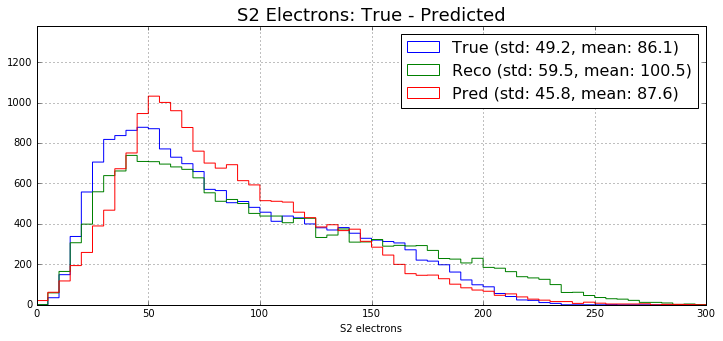

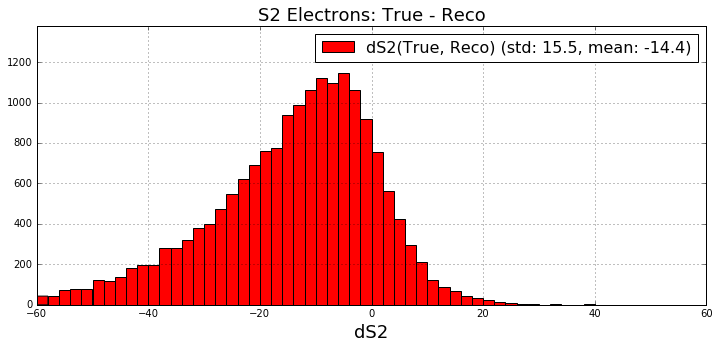

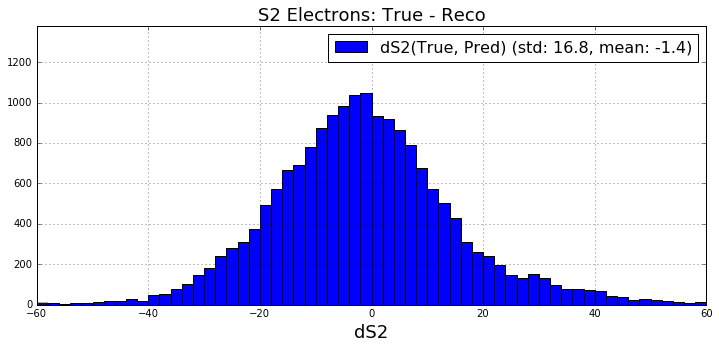

In [13]:

w, h = 12, 5


####################################################################################################
# S2 Electrons
####################################################################################################

print()

f = plt.figure(figsize=(w, h))
plt.hist(arr_s2_true, bins=s2_nbins, range=[0, s2_max], fill=False, histtype='step', label=s2_label_true)
plt.hist(arr_s2_reco, bins=s2_nbins, range=[0, s2_max], fill=False, histtype='step', label=s2_label_reco)
plt.hist(arr_s2_pred, bins=s2_nbins, range=[0, s2_max], fill=False, histtype='step', label=s2_label_pred)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('S2 Electrons: True - Predicted', fontsize=18)
plt.xlabel('S2 electrons', fontsize=10)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
# Resolution - Reco
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_ds2_reco, bins=s2_delta_nbins, range=[-s2_delta_max, s2_delta_max], color='r', label=ds2_label_reco)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('S2 Electrons: True - Reco', fontsize=18)
plt.xlabel('dS2', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
# Resolution
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_ds2_pred, bins=s2_delta_nbins, range=[-s2_delta_max, s2_delta_max], color='b', label=ds2_label_pred)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('S2 Electrons: True - Reco', fontsize=18)
plt.xlabel('dS2', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)




In [14]:

w, h = 12, 5

####################################################################################################
# Resolution - Prediction
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_pred, bins=dr_nbins, range=dr_range, histtype='bar', color='b', label=dr_label_true_pred)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X Predicted (barge NN)', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
# Resolution - TPF
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_tpf, bins=dr_nbins, range=dr_range, histtype='bar', color='r', label=dr_label_true_tpf)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X TPF', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
# Resolution - Xe NN
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_nn , bins=dr_nbins, range=dr_range, histtype='bar', color='r', label=dr_label_true_nn)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X NN (Xe)', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
# Position
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_r_true, bins=r_nbins, fill=False, histtype='step', label=label_true)
plt.hist(arr_r_tpf , bins=r_nbins, fill=False, histtype='step', label=label_tpf )
plt.hist(arr_r_nn  , bins=r_nbins, fill=False, histtype='step', label=label_nn  )
plt.hist(arr_r_pred, bins=r_nbins, fill=False, histtype='step', label=label_pred)
plt.xlabel('X (cm)', fontsize=18)
plt.title('X Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)

plt.savefig('plots/xyS2_position.png')


NameError: name 'arr_dr_true_pred' is not defined

In [9]:

#fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
#plt.subplot(rows, cols, 1)
